In [6]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

In [7]:
data = np.load("SAE_Sample.npy")
xs = data[0]
ys = data[1]
np.delete(xs,[0])
np.delete(ys,[0]);

In [10]:
# For helium s = 1 
s = 1 
###########

# First I define my fitting function
def y(theta,x):
    global s
    coulomb = (-1/(x+0.01))
    yukawa = (-np.exp(-theta[0]*x)/(x+0.01))
    
    inter = [theta[i+1]*np.exp(-theta[i+2]*x) for i in range(s)]
    shell = 0
    for term in inter:
        shell += term
        
    return  coulomb+yukawa+shell

# Next we define the function which finds the difference between the sample points and my fitting function
def fun(theta):
    return y(theta, xs) - ys

In [11]:
# Now we initialize a guess for the fitting paramters 
theta0 = [0]*(s+2)
result = least_squares(fun, theta0,loss = "soft_l1")
tol = 1E-10
def SAE(x):
    return -1/(x+tol) - np.exp(-2.03929*x)/(x+tol) - 0.3953*np.exp(-6.1805*x)
print(result.x)

[0.10228995 1.19886731 0.51031863]


(-10.0, 0.0)

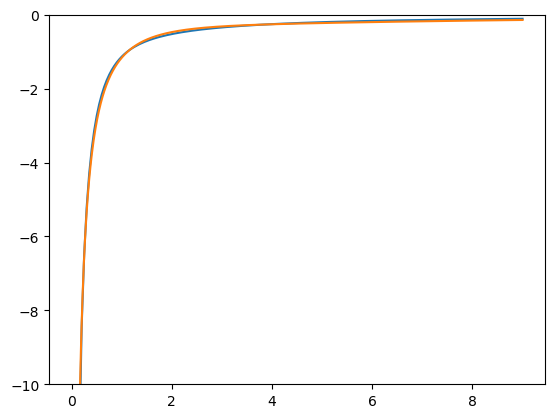

In [13]:
x = np.linspace(0.1,9,1000)
plt.plot(xs,ys)
plt.plot(x,y(result.x,x))

plt.ylim([-10,0])


0
